# Comparsion of classifiers on breast cancer data set  

In our project we have used one of the available sets of data in the Sklearn library. For the analysis we used Breast Cancer Wisconsin Data Set. We analyzed the collection containing cases of benign and malignant tumors, used several classifiers and compared their efficacy using accuracy and cross-validation results.

At the beginning we import all necessary libraries and define few functions which will make our report cleaner.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from neural_network import network_evaluate
from classifier_analysis import analyze
from treeVisualize import treeGraph

## Preliminary data analysis

We start by loading the data set and displaying its description

In [35]:
cdata = load_breast_cancer()
print(cdata['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

We see that there are 30 different variables in our set for each case. Of these 30 variables, 10 are the mean values of the given characteristics (e.g. radius, area, fractal dimension) of cancer cells. In addition, we have 10 variables about standard errors of the above average characteristics and 10 worst cases of each of these characteristics. Later we will compare our classifiers' results to results of classifiers trained on all avaible features. It's important to see if there's point in choosing all features, if the difference of accuracies won't be significant enough. <br>

In order to analyze these data, we choose only average values, because they tell us the most about our collection.We upload our data to pandas' data frame for convenience. Also we can see that our dataset is rather small - it has 569 instances. Because of that as metrics we're gonna use accuracy and cross validation score (because of small size).

In [36]:
x = cdata['data'][:,0:10]
y = cdata['target']
labels = cdata['feature_names'][0:10]

d = pd.DataFrame(data=x, columns=list(labels))
d.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Now we want to see how our variables are related to each other. For this purpose, we calculatet the correlation matrix, and then present it as a thermal map.

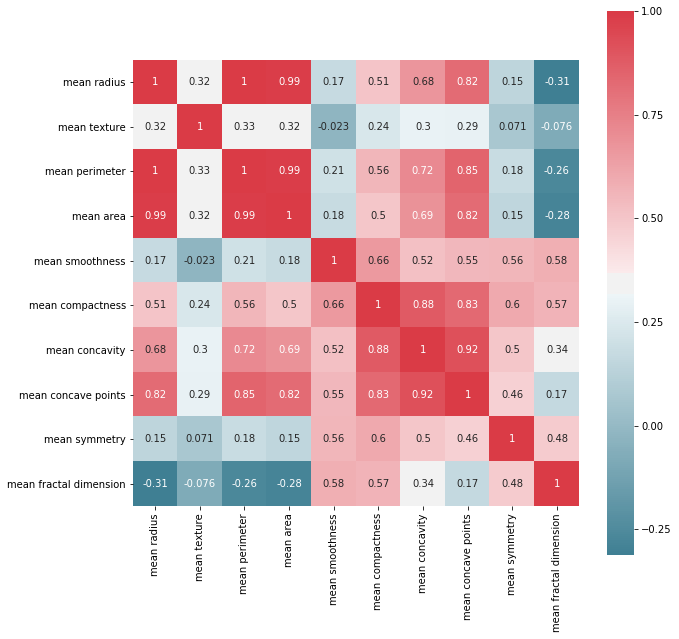

In [37]:
d = pd.DataFrame(data=x, columns=list(labels))
mask = np.zeros_like(d.corr(), dtype=np.bool)

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(d.corr(), mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot = True, ax=ax)
plt.show()

We can see that the average radius, circumference and surface are very strongly correlated with each other. For this reason, we will use only one of these variables later on. We can also see that the  variables <i>mean concavity, mean compactness, mean concave points</i> (correlation coefficient of 0.9) are correlated with each other, so we will also choose only one of them. We will use the <i>mean compactness</i> variable. So features in our model will be:

In [38]:
labels_new = ['mean texture', 'mean area', 'mean compactness', 'mean symmetry', 'mean fractal dimension']

We now create a vector with the features we have chosen, vector of classes and then divide it into vectors for training and testing. We also create <i>all_acc, all_mcv</i> vectors, in which we will keep the model accuracy values and the result of cross validation.

In [39]:
x_new = d[labels_new].get_values()
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

all_acc, all_mcv = [], []

## Comparsion of classifiers

The first classifier we will use is the classification by means of the SVC support vector machine.

In [40]:
clf = SVC(gamma = .001)
ac, cv = analyze(x_new, y, x_train, y_train, x_test, y_test, cdata, clf)
all_acc.append(ac)
all_mcv.append(cv)

classification report:
              precision    recall  f1-score   support

   malignant     0.9808    0.8095    0.8870        63
      benign     0.8992    0.9907    0.9427       108

   micro avg     0.9240    0.9240    0.9240       171
   macro avg     0.9400    0.9001    0.9148       171
weighted avg     0.9292    0.9240    0.9222       171

confusion matrix:
[[ 51  12]
 [  1 107]]
Accuracy: 0.924
Cross-validation score: 0.8949


 Matching the gamma well, we can see that already here we get high accuracy and slightly lower cross-validation score. We can also review the entire classification report and other factors such as precision and sensitivity on both classes. We can also see what the error matrix for the above classifier looks like. <br>

Then we will use logistic regression.`

In [41]:
clf1 = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', max_iter = 500)
ac, cv = analyze(x_new, y, x_train, y_train, x_test, y_test, cdata, clf1)
all_acc.append(ac)
all_mcv.append(cv)

classification report:
              precision    recall  f1-score   support

   malignant     1.0000    0.8095    0.8947        63
      benign     0.9000    1.0000    0.9474       108

   micro avg     0.9298    0.9298    0.9298       171
   macro avg     0.9500    0.9048    0.9211       171
weighted avg     0.9368    0.9298    0.9280       171

confusion matrix:
[[ 51  12]
 [  0 108]]
Accuracy: 0.9298
Cross-validation score: 0.8931


Afterwards we'll use the naive Bayes classifier.

In [42]:
clf2 = GaussianNB()
ac, cv = analyze(x_new, y, x_train, y_train, x_test, y_test, cdata, clf2)
all_acc.append(ac)
all_mcv.append(cv)

classification report:
              precision    recall  f1-score   support

   malignant     0.9818    0.8571    0.9153        63
      benign     0.9224    0.9907    0.9554       108

   micro avg     0.9415    0.9415    0.9415       171
   macro avg     0.9521    0.9239    0.9353       171
weighted avg     0.9443    0.9415    0.9406       171

confusion matrix:
[[ 54   9]
 [  1 107]]
Accuracy: 0.9415
Cross-validation score: 0.9052


Now we are going to use the decision trees as classifiers. At the beginning it will be a single decision tree with a specified maximum depth.


In [43]:
clf3 = DecisionTreeClassifier(max_depth = 3)
ac, cv = analyze(x_new, y, x_train, y_train, x_test, y_test, cdata, clf3)
all_acc.append(ac)
all_mcv.append(cv)

classification report:
              precision    recall  f1-score   support

   malignant     0.8906    0.9048    0.8976        63
      benign     0.9439    0.9352    0.9395       108

   micro avg     0.9240    0.9240    0.9240       171
   macro avg     0.9173    0.9200    0.9186       171
weighted avg     0.9243    0.9240    0.9241       171

confusion matrix:
[[ 57   6]
 [  7 101]]
Accuracy: 0.924
Cross-validation score: 0.9106


In the classification report we see that we get high values for both results, higher than in the case of the previous classifiers. It shouldn't be surprising, as decision trees are one of the best classifiers for classification. We can see how the decision tree looks like using the <i>treeVisualize</i> function, which takes as an argument the object of the classifier.

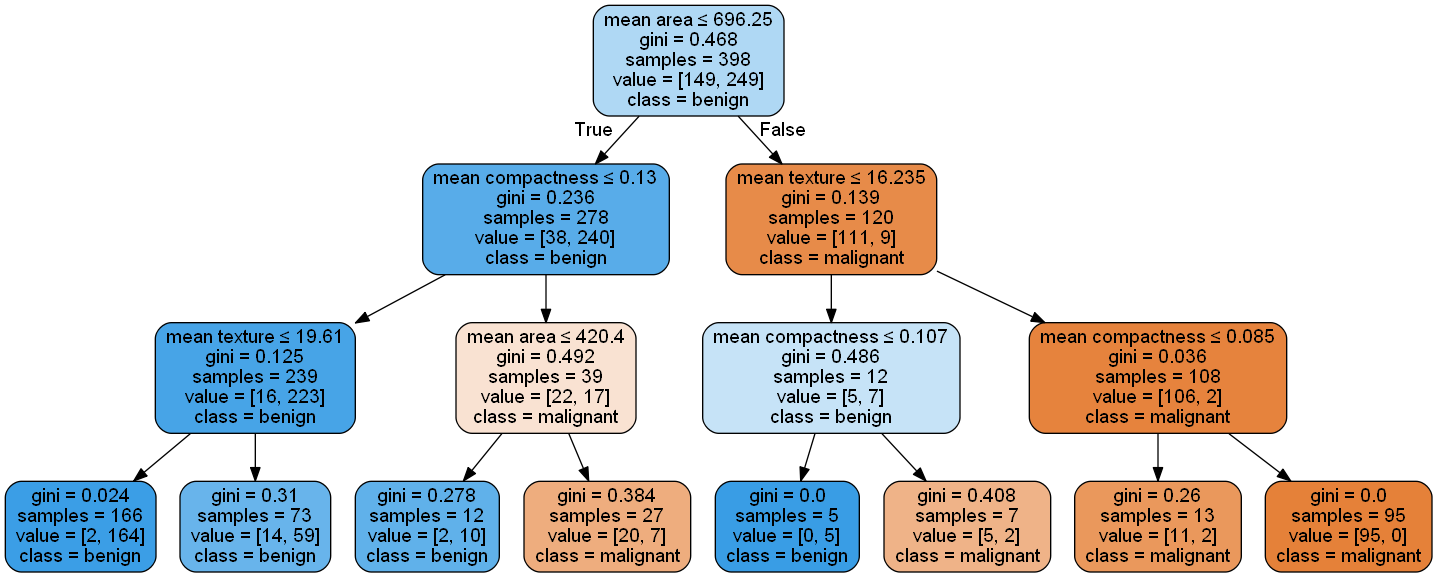

In [44]:
#To visualize tree it's necessary to install graphviz
treeGraph(clf3, cdata, labels_new)

As the last classifier we will use a random forest. We set the same depth as for a single tree.


In [45]:
clf4 = RandomForestClassifier(n_estimators=2000, max_depth=3, random_state=0)
ac, cv = analyze(x_new, y, x_train, y_train, x_test, y_test, cdata, clf4)
all_acc.append(ac)
all_mcv.append(cv)

classification report:
              precision    recall  f1-score   support

   malignant     0.9661    0.9048    0.9344        63
      benign     0.9464    0.9815    0.9636       108

   micro avg     0.9532    0.9532    0.9532       171
   macro avg     0.9563    0.9431    0.9490       171
weighted avg     0.9537    0.9532    0.9529       171

confusion matrix:
[[ 57   6]
 [  2 106]]
Accuracy: 0.9532
Cross-validation score: 0.9141


We can take a look again at one of the trees in our classifier as before.

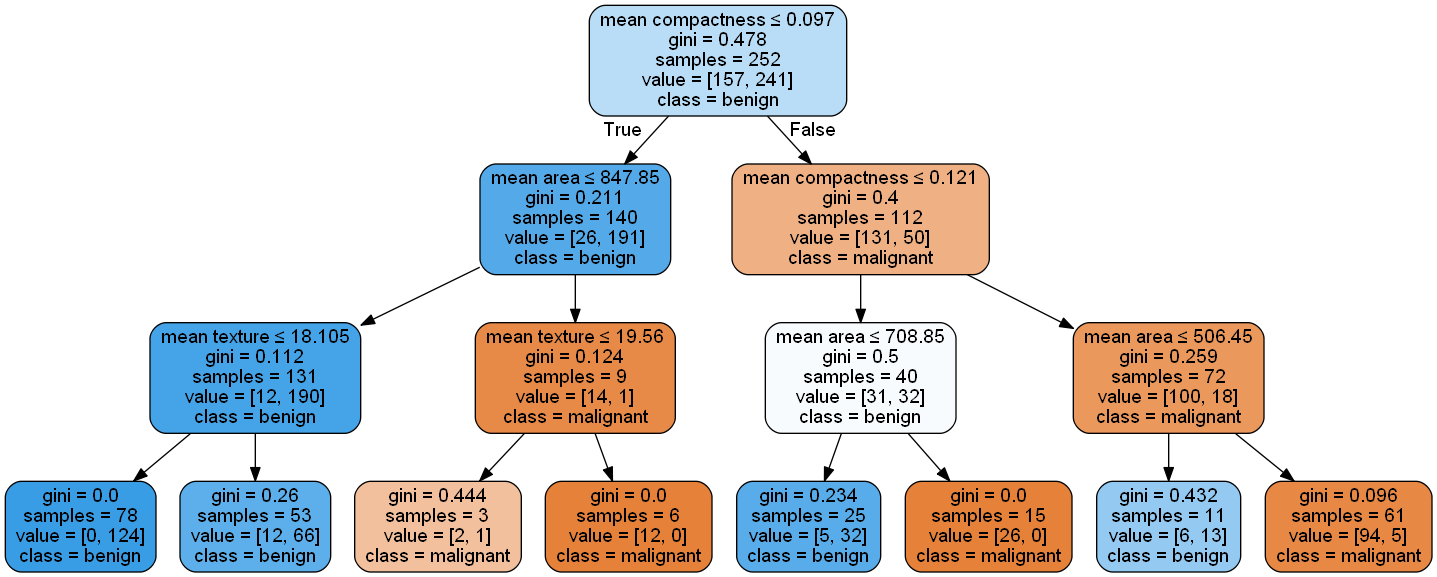

In [46]:
estimator = clf4.estimators_[1]
treeGraph(estimator, cdata, labels_new)

We will now compare the results of all the classifiers used. 

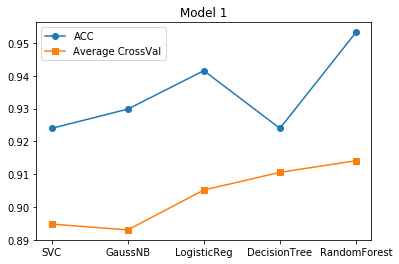

In [47]:
method = ['SVC', 'GaussNB', 'LogisticReg', 'DecisionTree', 'RandomForest'] 
plt.plot(method, all_acc, marker = 'o', label = 'ACC')
plt.plot(method, all_mcv, marker = 's', label = 'Average CrossVal')
plt.title('Model 1')
plt.legend()
plt.show()

We can see that the best of the classificators we have used is the random forest. Interestingly, we see that despite the fact that the accuracy of the logical regression, decision tree and random forest are similar, the result of cross validation are quite  different. <br>

We can also write down which features our best classifier treats as the most important. 

In [48]:
importance_feat = pd.Series(clf4.feature_importances_, index=labels_new)
print(importance_feat)

mean texture              0.129281
mean area                 0.515142
mean compactness          0.258108
mean symmetry             0.051996
mean fractal dimension    0.045472
dtype: float64


Finally, we can check whether the choice of a smaller number of features on the basis of the correlation matrix influenced the accuracy of our model, or maybe it wasn't necessary at all. In order to check this, we will compare the results of the classification of the learned models on all 10 features to the model analyzed above. <br> 

In [49]:
#We use set with all 10 features from labels
x_new2 = d[labels].get_values()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new2, y, test_size=0.3, random_state=42)

all_acc2, all_mcv2 = [], []

#We define all of our classifiers
clf = SVC(gamma = .001)
clf1 = LogisticRegression(random_state=1, solver='liblinear', multi_class='ovr', max_iter = 500)
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier(max_depth = 3)
clf4 = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0)

#We create list of our classifiers
clf_list = [clf, clf1, clf2, clf3, clf4]

for i in clf_list:
    print("Classifier type: ", type(i).__name__)
    #If we want to hide report of our analysis, we change variable show to False
    ac, cv = analyze(x_new2, y, x_train2, y_train2, x_test2, y_test2, cdata, i, show = False)
    all_acc2.append(ac)
    all_mcv2.append(cv)
    print('--------------------------------------------------------------------')

Classifier type:  SVC
--------------------------------------------------------------------
Classifier type:  LogisticRegression
--------------------------------------------------------------------
Classifier type:  GaussianNB
--------------------------------------------------------------------
Classifier type:  DecisionTreeClassifier
--------------------------------------------------------------------
Classifier type:  RandomForestClassifier
--------------------------------------------------------------------


Below we can see scores of testing our classifiers on bigger data set consisting of 10 features.

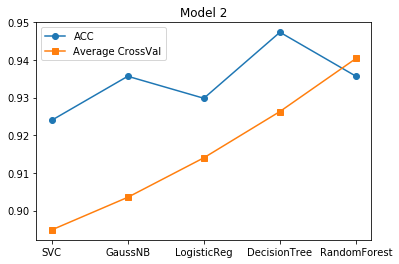

In [50]:
method = ['SVC', 'GaussNB', 'LogisticReg', 'DecisionTree', 'RandomForest'] 
plt.plot(method, all_acc2, marker = 'o', label = 'ACC')
plt.plot(method, all_mcv2, marker = 's', label = 'Average CrossVal')
plt.title('Model 2')
plt.legend()
plt.show()

Having scores from different number of used features we can now compare values of accuracy and mean cross validation score of analyzed two models.

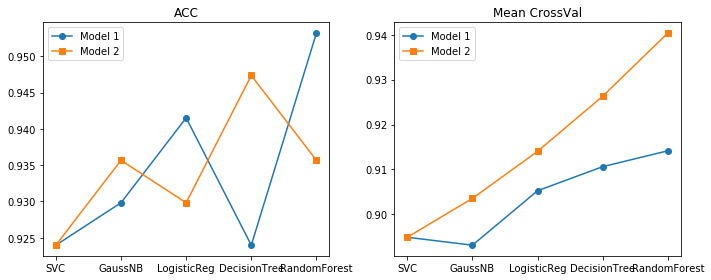

In [51]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(method, all_acc, marker = 'o', label = 'Model 1')
plt.plot(method, all_acc2, marker = 's', label = 'Model 2')
plt.title('ACC')
plt.legend()

plt.subplot(122)
plt.plot(method, all_mcv, marker = 'o', label = 'Model 1')
plt.plot(method, all_mcv2, marker = 's', label = 'Model 2')
plt.title('Mean CrossVal')
plt.legend()

plt.tight_layout()

On the graphs above we see that using all of the ten features we get better results, especially the result of cross validation. Let us now check which features are the most important in the random forest classification, if we take into account all the features:

In [52]:
importance_feat = pd.Series(clf4.feature_importances_, index=labels)
print(importance_feat)

mean radius               0.102946
mean texture              0.039141
mean perimeter            0.162745
mean area                 0.126777
mean smoothness           0.010816
mean compactness          0.039949
mean concavity            0.178171
mean concave points       0.325327
mean symmetry             0.006418
mean fractal dimension    0.007709
dtype: float64


Now we can try to see what results we're gonna get after training our different classifiers on whole data set with all avaible features.

In [53]:
x_new3 = cdata['data']
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_new3, y, test_size=0.3, random_state=42)

all_acc3, all_mcv3 = [], []

#We define all of our classifiers
clf = SVC(gamma = .001)
clf1 = LogisticRegression(random_state=1, solver='liblinear', multi_class='ovr', max_iter = 500)
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier(max_depth = 3)
clf4 = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0)

#We create list of our classifiers
clf_list = [clf, clf1, clf2, clf3, clf4]

for i in clf_list:
    print("Classifier type: ", type(i).__name__)
    ac, cv = analyze(x_new3, y, x_train3, y_train3, x_test3, y_test3, cdata, i, False)
    all_acc3.append(ac)
    all_mcv3.append(cv)
    print('--------------------------------------------------------------------')

Classifier type:  SVC
--------------------------------------------------------------------
Classifier type:  LogisticRegression
--------------------------------------------------------------------
Classifier type:  GaussianNB
--------------------------------------------------------------------
Classifier type:  DecisionTreeClassifier
--------------------------------------------------------------------
Classifier type:  RandomForestClassifier
--------------------------------------------------------------------


In [54]:
importance_feat = pd.Series(clf4.feature_importances_, index=cdata['feature_names'])
print(importance_feat)

mean radius                0.036547
mean texture               0.008760
mean perimeter             0.051319
mean area                  0.042199
mean smoothness            0.003686
mean compactness           0.013660
mean concavity             0.067576
mean concave points        0.131730
mean symmetry              0.001462
mean fractal dimension     0.001683
radius error               0.017362
texture error              0.001769
perimeter error            0.010678
area error                 0.031261
smoothness error           0.001806
compactness error          0.002140
concavity error            0.003723
concave points error       0.002468
symmetry error             0.002669
fractal dimension error    0.003138
worst radius               0.100879
worst texture              0.012726
worst perimeter            0.126320
worst area                 0.105364
worst smoothness           0.007551
worst compactness          0.013197
worst concavity            0.036735
worst concave points       0

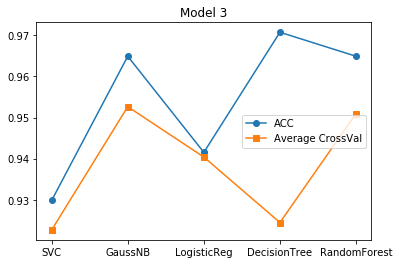

In [55]:
method = ['SVC', 'GaussNB', 'LogisticReg', 'DecisionTree', 'RandomForest'] 
plt.plot(method, all_acc3, marker = 'o', label = 'ACC')
plt.plot(method, all_mcv3, marker = 's', label = 'Average CrossVal')
plt.title('Model 3')
plt.legend()
plt.show()

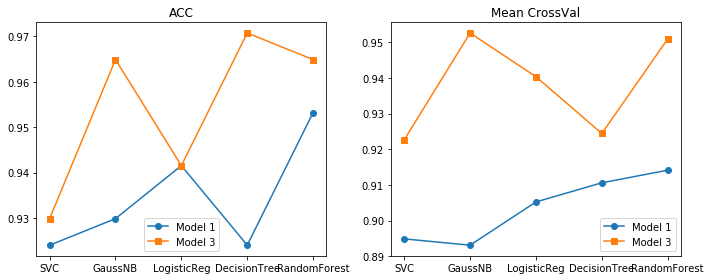

In [56]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(method, all_acc, marker = 'o', label = 'Model 1')
plt.plot(method, all_acc3, marker = 's', label = 'Model 3')
plt.title('ACC')
plt.legend()

plt.subplot(122)
plt.plot(method, all_mcv, marker = 'o', label = 'Model 1')
plt.plot(method, all_mcv3, marker = 's', label = 'Model 3')
plt.title('Mean CrossVal')
plt.legend()

plt.tight_layout()

Looking at accuracy of our classifiers we can see, that if we want to have the highest accuracy it's the best to use whole data set. As we can see above, difference between models trained on 5 choosen features and models trained on whole dataset is quite significant

At the end as we're using our whole dataset, we can also see if we can get some good accuracy using neural network. We use neural newtwork with 2 hidden layers and dropout regularizer between 1st and 2nd layer, to stop our neural network from overfitting. Our neural network and evaluation of it is in neural_network.py package.

In [57]:
#We can change number of neurons in hidden layer by giving function network_evaluate additional variables 
ac, cv, history = network_evaluate(x_new3, y, x_test3, y_test3,  x_train3, y_train3, cdata)
all_acc3.append(ac)
all_mcv3.append(cv)

F:\Jupyter\Cancer analysis\neural_network.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(36, kernel_initializer="uniform", activation="relu", input_dim=30)`
  model.add(Dense(neurons_1, input_dim = len(X[0]), init='uniform', activation='relu'))
F:\Jupyter\Cancer analysis\neural_network.py:22: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  model.add(Dropout(p=0.1))
F:\Jupyter\Cancer analysis\neural_network.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, kernel_initializer="uniform", activation="relu")`
  model.add(Dense(neurons_2, init='uniform', activation='relu'))
F:\Jupyter\Cancer analysis\neural_network.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`
  model.add(Dense(1,init = 'uniform', activation = 'sigmoid'))
F:\Jupyter\Cancer analysis\neural_network.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: 

classification report:
              precision    recall  f1-score   support

   malignant     0.9677    0.9524    0.9600        63
      benign     0.9725    0.9815    0.9770       108

   micro avg     0.9708    0.9708    0.9708       171
   macro avg     0.9701    0.9669    0.9685       171
weighted avg     0.9707    0.9708    0.9707       171

confusion matrix:
[[ 60   3]
 [  2 106]]
Accuracy: 0.9708
Cross-validation score: 0.9579


Below we can see history of training of our neural network.

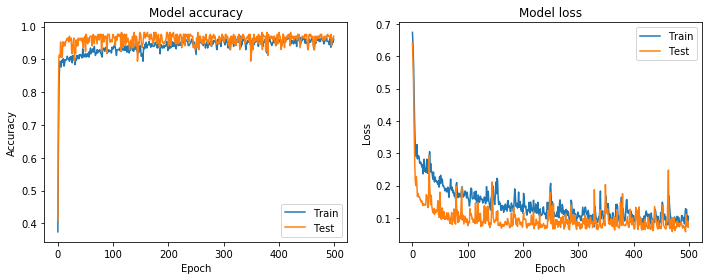

In [64]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.tight_layout()
plt.show()

Having evaluated neural network, we can compare it to the classifiers trained before.

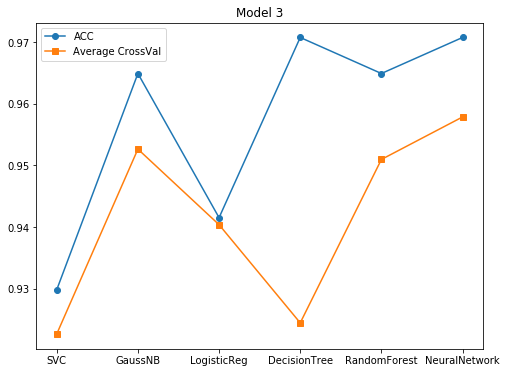

In [59]:
plt.figure(figsize=(8,6))
method = ['SVC', 'GaussNB', 'LogisticReg', 'DecisionTree', 'RandomForest', 'NeuralNetwork'] 
plt.plot(method, all_acc3, marker = 'o', label = 'ACC')
plt.plot(method, all_mcv3, marker = 's', label = 'Average CrossVal')
plt.title('Model 3')
plt.legend()
plt.show()

## Summary
We saw, that the best model for our dataset is built by us neural network. Also looking at importance of features in random forest we can see, that concave points tell us the most about our case.